<a href="https://colab.research.google.com/github/YMGYM/python_deeplearning_pytorch/blob/main/Pytorch_part3~.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-1 Convolutional Neural Network(CNN)

## CNN 기초

### Convolution Layer

이미지를 스캔하면서 이미지 Region Feature를 추출한다.

### Stride
Receptive Field 가 피쳐를 뽑을 때 이동하는 칸 수

### Padding
이미지 테두리 부분에도 Convolution을 적용하기 위해 사용

### Weight Sharing
슬라이드할 때마다 Window 의 같은 가중치를 공유..

### pooling
학습 속도 향상.
Layer 가중치를 반으로 줄여 줌

### Fully Connected Layer
Flatten 후 학습


# 3-2 CNN과 MLP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else 'cpu'

In [ ]:
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
train_dataset = datasets.CIFAR10(root='../data/CIFAR', train=True, download=True, transform = transforms.ToTensor())
test_dataset = datasets.CIFAR10(root='../data/CIFAR', train=False, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size= BATCH_SIZE, shuffle=False)

Files already downloaded and verified


In [ ]:
for (X_train, y_train) in train_loader:
  print(f"X_train : {X_train.size()} type: {X_train.type()}")
  print(f"y_train : {y_train.size()} type: {y_train.type()}")
  break

X_train : torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
y_train : torch.Size([32]) type: torch.LongTensor


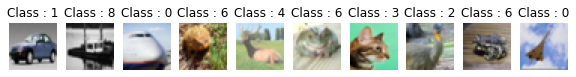

In [ ]:
pltsize = 1
plt.figure(figsize =(10*pltsize, pltsize))

for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.axis('off')
  plt.imshow(np.transpose(X_train[i], (1,2,0)))
  plt.title('Class : ' + str(y_train[i].item()))

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(32*32*3, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)

  def forward(self, x):
    x = x.view(-1, 32 * 32 * 3)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    return x

In [ ]:
model = Net().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
model

Net(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx, (image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)

    optimizer.zero_grad()
    output = model(image)
    
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print(f" Train Epoch : {Epoch}[{batch_idx * len(image)} / {len(train_loader.dataset)}] {100. * batch_idx / len(train_loader):0.6f}%\t Train Loss : {loss.item()}") 

In [ ]:
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for image, label in test_loader:
      label = label.to(DEVICE)
      image = image.to(DEVICE)

      output = model(image)

      
      test_loss += criterion(output, label).item()
      prediction = output.max(1, keepdim = True)[1]
      correct += prediction.eq(label.view_as(prediction)).sum().item()

  test_loss /= len(test_loader.dataset)

  test_accuracy = 100. * correct / len(test_loader.dataset)
  return test_loss, test_accuracy



In [ ]:
for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n Test. EPOCH: {Epoch}\t Test Loss : {test_loss:0.4f}\t Test Accuracy: {test_accuracy:0.4f}")

 Train Epoch : 1[0 / 50000] 0.000000%	 Train Loss : 1.890013575553894
 Train Epoch : 1[6400 / 50000] 12.795905%	 Train Loss : 1.6172072887420654
 Train Epoch : 1[12800 / 50000] 25.591811%	 Train Loss : 1.3881436586380005
 Train Epoch : 1[19200 / 50000] 38.387716%	 Train Loss : 1.449142575263977
 Train Epoch : 1[25600 / 50000] 51.183621%	 Train Loss : 1.3396453857421875
 Train Epoch : 1[32000 / 50000] 63.979527%	 Train Loss : 1.4972102642059326
 Train Epoch : 1[38400 / 50000] 76.775432%	 Train Loss : 1.5571694374084473
 Train Epoch : 1[44800 / 50000] 89.571337%	 Train Loss : 1.5386818647384644

 Test. EPOCH: 1	 Test Loss : 0.0502	 Test Accuracy: 42.5300
 Train Epoch : 2[0 / 50000] 0.000000%	 Train Loss : 1.602581262588501
 Train Epoch : 2[6400 / 50000] 12.795905%	 Train Loss : 1.348524808883667
 Train Epoch : 2[12800 / 50000] 25.591811%	 Train Loss : 1.4899369478225708
 Train Epoch : 2[19200 / 50000] 38.387716%	 Train Loss : 1.6458021402359009
 Train Epoch : 2[25600 / 50000] 51.183621%	

In [ ]:
# CNN 모델 설계
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(
        in_channels = 3, out_channels = 8,
        kernel_size = 3,
        padding = 1
    )
    self.conv2 = nn.Conv2d(
        in_channels = 8, out_channels = 16,
        kernel_size = 3,
        padding = 1
    )
    self.pool = nn.MaxPool2d(
        kernel_size =2, stride = 2
    )

    self.fc1 = nn.Linear(8 * 8 * 16, 64)
    self.fc2 = nn.Linear(64, 32)
    self.fc3 = nn.Linear(32, 10)
  
  def forward(self, x):
    # x = (32, 32, 3)
    x = self.conv1(x) # x = (32, 32, 3) ## len(x) - kernel_size + 1
    x = F.relu(x)
    x = self.pool(x) # x = (16, 16, 3)
    x = self.conv2(x) # x = (16, 16, 3) 
    x = F.relu(x)
    x = self.pool(x) # x = (8, 8, 3)

    x = x.view(-1, 8* 8 * 16)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.log_softmax(x)

    return x

In [ ]:
model = CNN().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n Test. EPOCH: {Epoch}\t Test Loss : {test_loss:0.4f}\t Test Accuracy: {test_accuracy:0.4f}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


 Train Epoch : 1[0 / 50000] 0.000000%	 Train Loss : 2.316953420639038
 Train Epoch : 1[6400 / 50000] 12.795905%	 Train Loss : 1.9072537422180176
 Train Epoch : 1[12800 / 50000] 25.591811%	 Train Loss : 1.8389112949371338
 Train Epoch : 1[19200 / 50000] 38.387716%	 Train Loss : 1.7483105659484863
 Train Epoch : 1[25600 / 50000] 51.183621%	 Train Loss : 1.8058133125305176
 Train Epoch : 1[32000 / 50000] 63.979527%	 Train Loss : 1.4402661323547363
 Train Epoch : 1[38400 / 50000] 76.775432%	 Train Loss : 1.7851563692092896
 Train Epoch : 1[44800 / 50000] 89.571337%	 Train Loss : 1.2397018671035767

 Test. EPOCH: 1	 Test Loss : 0.0479	 Test Accuracy: 43.4600
 Train Epoch : 2[0 / 50000] 0.000000%	 Train Loss : 1.6670119762420654
 Train Epoch : 2[6400 / 50000] 12.795905%	 Train Loss : 1.3766518831253052
 Train Epoch : 2[12800 / 50000] 25.591811%	 Train Loss : 1.3970381021499634
 Train Epoch : 2[19200 / 50000] 38.387716%	 Train Loss : 1.3448647260665894
 Train Epoch : 2[25600 / 50000] 51.18362

# 3-3 Data Augmentation

이미지에 변형을 가하면 데이터를 증가시킬 수 있다.

In [ ]:
# Data augmentation 해서 이미지를 불러 옴
train_dataset = datasets.CIFAR10(root = '../data/CIFAR', train=True, download=True, 
                                 transform=transforms.Compose([
                                                               transforms.RandomHorizontalFlip(), # 좌우반전 (50% 확률)
                                                               transforms.ToTensor(), # 정규화(0~1) 및 텐서화
                                                               transforms.Normalize((0.5, 0.5,0.5),(0.5, 0.5,0.5)) # 데이터 정규화(평균과 표준편차 조정), 평균과 표준편차 RGB에 각각 0.5 씩 적용
                                                               ]))
test_dataset = datasets.CIFAR10(root = '../data/CIFAR', train=False, transform=transforms.Compose([transforms.RandomHorizontalFlip(),transforms.ToTensor(), transforms.Normalize((0.5, 0.5,0.5),(0.5, 0.5,0.5))]))

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Files already downloaded and verified


In [ ]:
# Augmentation 된 데이터로 학습
model = CNN().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval=200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n Test. EPOCH: {Epoch}\t Test Loss : {test_loss:0.4f}\t Test Accuracy: {test_accuracy:0.4f}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


 Train Epoch : 1[0 / 50000] 0.000000%	 Train Loss : 2.2860872745513916
 Train Epoch : 1[6400 / 50000] 12.795905%	 Train Loss : 1.8045079708099365
 Train Epoch : 1[12800 / 50000] 25.591811%	 Train Loss : 1.5831940174102783
 Train Epoch : 1[19200 / 50000] 38.387716%	 Train Loss : 1.7501087188720703
 Train Epoch : 1[25600 / 50000] 51.183621%	 Train Loss : 1.2511940002441406
 Train Epoch : 1[32000 / 50000] 63.979527%	 Train Loss : 1.6675397157669067
 Train Epoch : 1[38400 / 50000] 76.775432%	 Train Loss : 1.1892845630645752
 Train Epoch : 1[44800 / 50000] 89.571337%	 Train Loss : 1.4666515588760376

 Test. EPOCH: 1	 Test Loss : 0.0412	 Test Accuracy: 52.3600
 Train Epoch : 2[0 / 50000] 0.000000%	 Train Loss : 1.574581503868103
 Train Epoch : 2[6400 / 50000] 12.795905%	 Train Loss : 1.1965786218643188
 Train Epoch : 2[12800 / 50000] 25.591811%	 Train Loss : 1.3584741353988647
 Train Epoch : 2[19200 / 50000] 38.387716%	 Train Loss : 1.2028850317001343
 Train Epoch : 2[25600 / 50000] 51.18362

# 3-4 CNN Architecture

### ImageNet
이미지 분류 모델을 측정하기 위한 데이터로 가장 많이 사용되는 데이터

### Network Architecture
네트워크의 성능을 높이기 위한 구조, 깊게 쌓으면서 과적합을 방지하고자 하는 연구.

### LeNet
최초의 CNN모델.
(1990년대에 나온 모델이므로 비교적 단순한 구조를 가지고 있음)

### Alexnet
2012 ILSVRC 대회 우승 모델. 구조는 크게 다르지 않지만 Dropoout, DataAugmentation등을 적용했다.

### VGG
2014 ILSVRC 대회에서 2등을 차지한 모델.

3*3 합성곱 층을 깊게 중첩하는 것이 특징

### GoogLeNet

2014 ILSVRC 대회에서 1등한 모델.

Inception 구조를 처음 적용하고 Gloval Average Pooling 을 처음 적용했음.

### ResNet

2015 ILSVRC 대회에서 1등.
이미지 분류의 기본 모델로 사용하고 있음.

Residual Block 이란 개념 도입. (이전 층의 feature Map을 다음 층의 feature map 에 더해줌) -> 기울기 소실 제거

### DenseNet

ResNet의 확장형 버전. 모든 층에 대해 Skip connection 을 연결한다.

In [2]:
import torch
import torch.nn as nn
import torch.functional as F

In [3]:
class BasicBlock(nn.Module):
  def __init__(self, in_planes, planes, stride = 1):
    super(BasicBlock, self).__init__()
    self.conv1 = nn.Conv2d(in_planes, planes,
                           kernel_size = 3,
                           stride = stride,
                           padding = 1,
                           bias = False)
    self.bn1 = nn.BatchNorm2d(planes)
    self.conv2 = nn.Conv2d(planes, planes,
                           kernel_size = 3,
                           stride = 1,
                           padding = 1,
                           bias = False)
    self.bn2 = nn.BatchNorm2d(planes)

    self.shortcut = nn.Sequential()
    if stride != 1 or in_planes != planes:
      self.shortcut = nn.Sequential(
          nn.Conv2d(in_planes, planes,
                    kernel_size = 1,
                    stride = stride,
                    bias = False),

          nn.BathcNorm2d(planes)
      )

  def forward(self, x):
    out = F.relu(self.bn1(self.conv1(x)))
    out = self.bn2(self.conv2(out))
    out += self.sortcut(x)
    out = F.relu(out)
    
    return out

In [5]:
class ResNet(nn.Module):
  def __init__(self, num_classes = 10):
    super(ResNet, self).__init__()
    self.in_plane = 16

    self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
    self.bn1 = nn.BatchNorm2d(16)
    self.layer1 = self._make_layer(16, 2, stride=1)
    self.layer2 = self._make_layer(32, 2, stride = 2)
    self.layer3 = self._make_layer(64, 2, stride = 2)
    self.linear = nn.Linear(64, num_classes)


  def _make_layer(self, planes, num_blocks, stride):
    stride = [stride] + [1] * (num_blocks - 1)
    layers = []

    for stride in stride:
      layers.append(BasicBlock(self.in_planes, planes, stride))
      self.in_planes = planes
    return nn.Sequential(*layers)

  def forward(self, x):
    out = F.relu(self.bn1(self.conv1(x)))
    out = self.layer1(out)
    out = self.layer2(out)
    out = self.layer3(out)
    out = F.avg_pool2d(out, 8)
    out = out.view(out.size(0), -1)
    out = self.linear(out)

    return out